# KNN & PCA KNN & PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression, load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KDTree, BallTree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve

In [ ]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)
print(f"21. Iris KNN Accuracy: {accuracy_score(y_test_iris, y_pred_iris)}")

21. Iris KNN Accuracy: 1.0


In [ ]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
print(f"22. KNN Regressor MSE: {mean_squared_error(y_test_reg, y_pred_reg)}")

22. KNN Regressor MSE: 510.24800442284806


In [ ]:

# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_euclidean.fit(X_train_iris, y_train_iris)
knn_manhattan.fit(X_train_iris, y_train_iris)
y_pred_euclidean = knn_euclidean.predict(X_test_iris)
y_pred_manhattan = knn_manhattan.predict(X_test_iris)
print(f"23. Euclidean KNN Accuracy: {accuracy_score(y_test_iris, y_pred_euclidean)}")
print(f"23. Manhattan KNN Accuracy: {accuracy_score(y_test_iris, y_pred_manhattan)}")

23. Euclidean KNN Accuracy: 1.0
23. Manhattan KNN Accuracy: 1.0


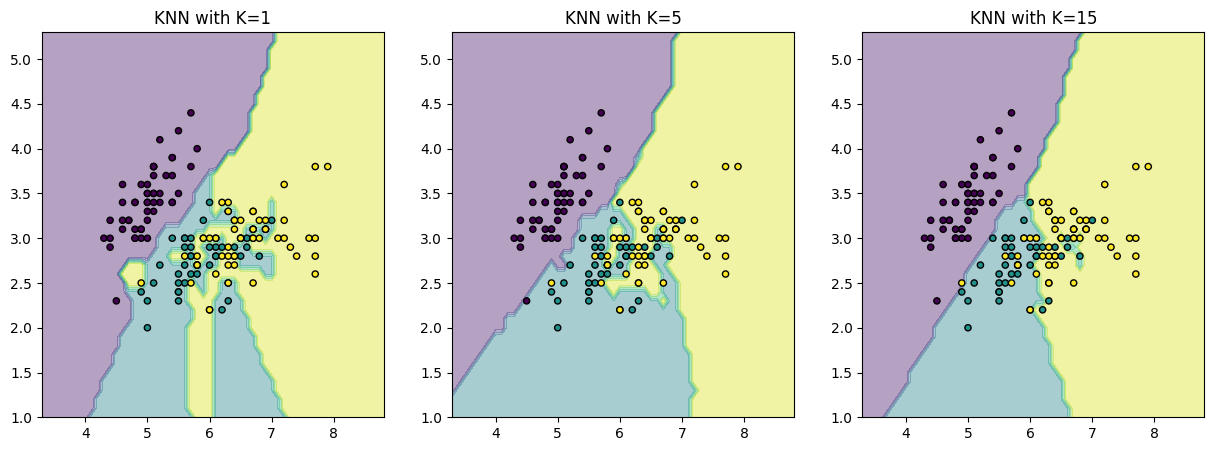

In [ ]:

# 24. Train a KNN Classifier with different values of K and visualize decision boundaries
def plot_decision_boundary(X, y, k_values):
    plt.figure(figsize=(15, 5))
    for i, k in enumerate(k_values):
        plt.subplot(1, len(k_values), i + 1)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
        plt.title(f"KNN with K={k}")
    plt.show()

plot_decision_boundary(X_iris[:, :2], y_iris, [1, 5, 15])

In [ ]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train_iris)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print(f"25. Scaled KNN Accuracy: {accuracy_score(y_test_iris, y_pred_scaled)}")

25. Scaled KNN Accuracy: 1.0


In [ ]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component
X_pca = np.random.rand(100, 4)
pca = PCA(n_components=4)
pca.fit(X_pca)
print(f"26. PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

26. PCA Explained Variance Ratio: [0.31700052 0.27131452 0.21814413 0.19354084]


In [ ]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
pca_iris = PCA(n_components=2)
X_train_pca = pca_iris.fit_transform(X_train_iris)
X_test_pca = pca_iris.transform(X_test_iris)
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_iris)
y_pred_pca = knn_pca.predict(X_test_pca)
print(f"27. PCA + KNN Accuracy: {accuracy_score(y_test_iris, y_pred_pca)}")

27. PCA + KNN Accuracy: 1.0


In [ ]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_iris, y_train_iris)
print(f"28. Best KNN Parameters: {grid_search.best_params_}")

28. Best KNN Parameters: {'n_neighbors': 3}


In [ ]:

# 29. Train a KNN Classifier and check the number of misclassified samples
misclassified = (y_pred_iris != y_test_iris).sum()
print(f"29. Misclassified Samples: {misclassified}")

29. Misclassified Samples: 0


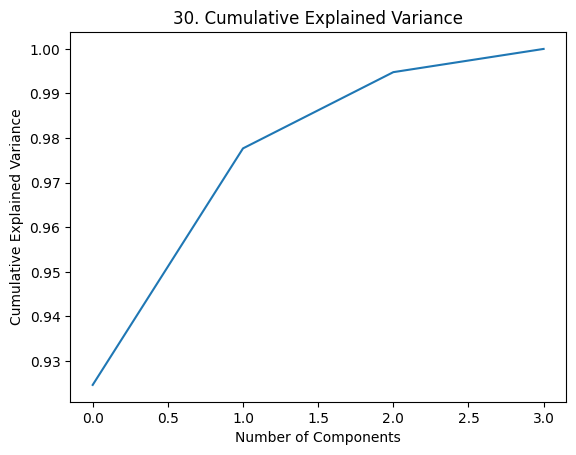

In [ ]:
# 30. Train a PCA model and visualize the cumulative explained variance.
pca_cumulative = PCA()
pca_cumulative.fit(X_iris)
cumulative_variance = np.cumsum(pca_cumulative.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('30. Cumulative Explained Variance')
plt.show()

In [ ]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_uniform.fit(X_train_iris, y_train_iris)
knn_distance.fit(X_train_iris, y_train_iris)
y_pred_uniform = knn_uniform.predict(X_test_iris)
y_pred_distance = knn_distance.predict(X_test_iris)
print(f"31. Uniform Weights KNN Accuracy: {accuracy_score(y_test_iris, y_pred_uniform)}")
print(f"31. Distance Weights KNN Accuracy: {accuracy_score(y_test_iris, y_pred_distance)}")

31. Uniform Weights KNN Accuracy: 1.0
31. Distance Weights KNN Accuracy: 1.0


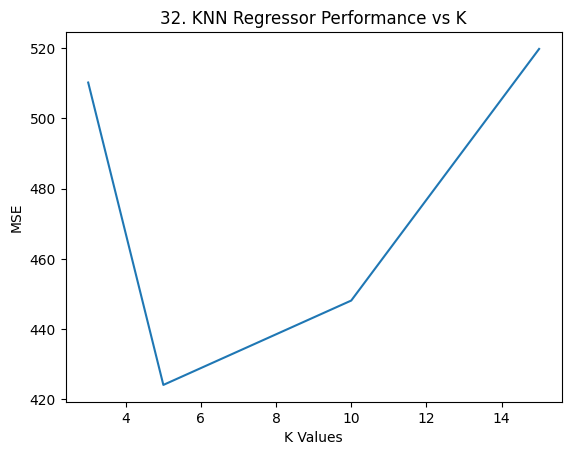

In [ ]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance
k_values = [3, 5, 10, 15]
mse_values = []
for k in k_values:
    knn_reg_k = KNeighborsRegressor(n_neighbors=k)
    knn_reg_k.fit(X_train_reg, y_train_reg)
    y_pred_reg_k = knn_reg_k.predict(X_test_reg)
    mse_values.append(mean_squared_error(y_test_reg, y_pred_reg_k))
plt.plot(k_values, mse_values)
plt.xlabel('K Values')
plt.ylabel('MSE')
plt.title('32. KNN Regressor Performance vs K')
plt.show()

In [ ]:
# 33. Implement KNN Imputation for handling missing values in a dataset
X_missing = X_iris.copy()
X_missing[np.random.choice(X_missing.shape[0], 20), np.random.choice(X_missing.shape[1], 20)] = np.nan
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)
print(f"33. Imputed Data Shape: {X_imputed.shape}")

33. Imputed Data Shape: (150, 4)


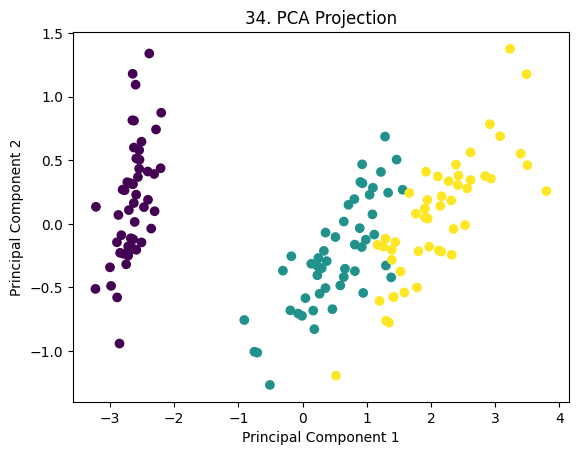

In [ ]:

# 34. Train a PCA model and visualize the data projection onto the first two principal components
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_iris)
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y_iris)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('34. PCA Projection')
plt.show()

In [ ]:

# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
knn_kd = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_ball = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_kd.fit(X_train_iris, y_train_iris)
knn_ball.fit(X_train_iris, y_train_iris)
y_pred_kd = knn_kd.predict(X_test_iris)
y_pred_ball = knn_ball.predict(X_test_iris)
print(f"35. KD Tree KNN Accuracy: {accuracy_score(y_test_iris, y_pred_kd)}")
print(f"35. Ball Tree KNN Accuracy: {accuracy_score(y_test_iris, y_pred_ball)}")


35. KD Tree KNN Accuracy: 1.0
35. Ball Tree KNN Accuracy: 1.0


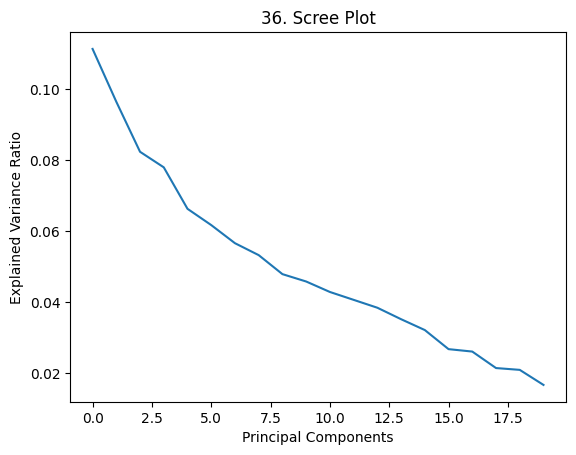

In [ ]:

# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
X_high = np.random.rand(100, 20)
pca_scree = PCA()
pca_scree.fit(X_high)
plt.plot(pca_scree.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('36. Scree Plot')
plt.show()

In [ ]:

# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
print("37. Classification Report:")
print(classification_report(y_test_iris, y_pred_iris))
print(f"37. Precision: {precision_score(y_test_iris, y_pred_iris, average='weighted')}")
print(f"37. Recall: {recall_score(y_test_iris, y_pred_iris, average='weighted')}")
print(f"37. F1-Score: {f1_score(y_test_iris, y_pred_iris, average='weighted')}")


37. Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

37. Precision: 1.0
37. Recall: 1.0
37. F1-Score: 1.0


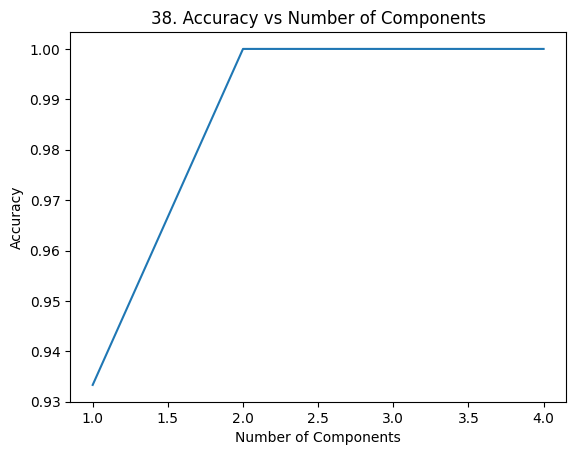

In [ ]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy
accuracy_pca = []
for n_components in range(1, 5):
    pca_n = PCA(n_components=n_components)
    X_train_pca_n = pca_n.fit_transform(X_train_iris)
    X_test_pca_n = pca_n.transform(X_test_iris)
    knn_n = KNeighborsClassifier(n_neighbors=3)
    knn_n.fit(X_train_pca_n, y_train_iris)
    y_pred_pca_n = knn_n.predict(X_test_pca_n)
    accuracy_pca.append(accuracy_score(y_test_iris, y_pred_pca_n))
plt.plot(range(1, 5), accuracy_pca)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('38. Accuracy vs Number of Components')
plt.show()

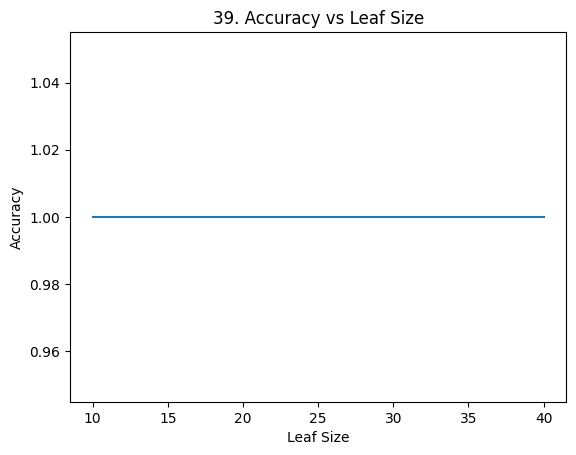

In [ ]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy
leaf_sizes = [10, 20, 30, 40]
accuracy_leaf = []
for leaf_size in leaf_sizes:
    knn_leaf = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)
    knn_leaf.fit(X_train_iris, y_train_iris)
    y_pred_leaf = knn_leaf.predict(X_test_iris)
    accuracy_leaf.append(accuracy_score(y_test_iris, y_pred_leaf))
plt.plot(leaf_sizes, accuracy_leaf)
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('39. Accuracy vs Leaf Size')
plt.show()

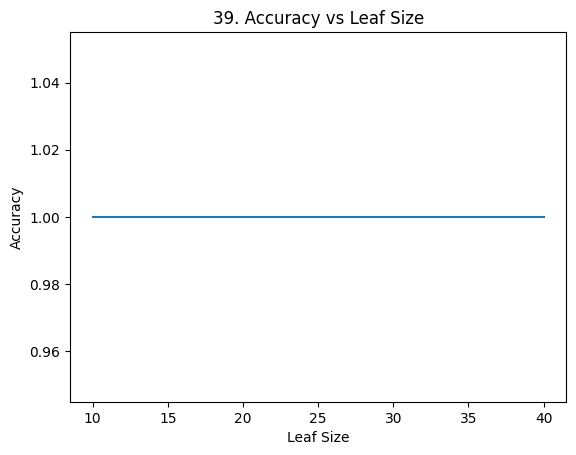

In [ ]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy
leaf_sizes = [10, 20, 30, 40]
accuracy_leaf = []
for leaf_size in leaf_sizes:
    knn_leaf = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)
    knn_leaf.fit(X_train_iris, y_train_iris)
    y_pred_leaf = knn_leaf.predict(X_test_iris)
    accuracy_leaf.append(accuracy_score(y_test_iris, y_pred_leaf))
plt.plot(leaf_sizes, accuracy_leaf)
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('39. Accuracy vs Leaf Size')
plt.show()

In [ ]:

# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_wine, y_train_wine)
y_pred_wine = knn_wine.predict(X_test_wine)
print("41. Wine Dataset Classification Report:")
print(classification_report(y_test_wine, y_pred_wine))

41. Wine Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



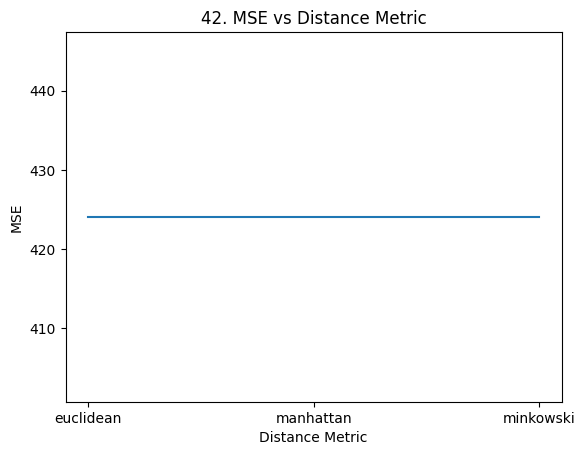

In [ ]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
mse_distance = []
for metric in distance_metrics:
    knn_reg_distance = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg_distance.fit(X_train_reg, y_train_reg)
    y_pred_reg_distance = knn_reg_distance.predict(X_test_reg)
    mse_distance.append(mean_squared_error(y_test_reg, y_pred_reg_distance))
plt.plot(distance_metrics, mse_distance)
plt.xlabel('Distance Metric')
plt.ylabel('MSE')
plt.title('42. MSE vs Distance Metric')
plt.show()

In [ ]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score
y_prob_iris = knn_iris.predict_proba(X_test_iris)
roc_auc = roc_auc_score(y_test_iris, y_prob_iris, multi_class='ovr')
print(f"43. ROC-AUC Score: {roc_auc}")

43. ROC-AUC Score: 1.0


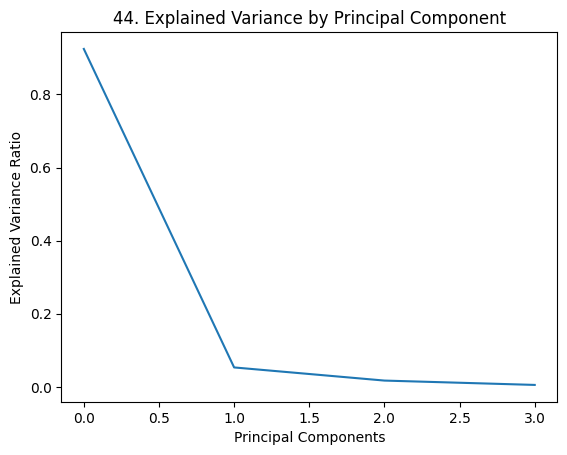

In [ ]:
# 44. Train a PCA model and visualize the variance captured by each principal component
pca_variance = PCA()
pca_variance.fit(X_iris)
plt.plot(pca_variance.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('44. Explained Variance by Principal Component')
plt.show()

In [ ]:
# 45. Train a KNN Classifier and perform feature selection before training
selector = SelectKBest(f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_iris, y_train_iris)
X_test_selected = selector.transform(X_test_iris)
knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train_iris)
y_pred_selected = knn_selected.predict(X_test_selected)
print(f"45. Feature Selected KNN Accuracy: {accuracy_score(y_test_iris, y_pred_selected)}")

45. Feature Selected KNN Accuracy: 1.0


In [ ]:
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions
pca_reconstruction = PCA(n_components=2)
X_reduced = pca_reconstruction.fit_transform(X_iris)
X_reconstructed = pca_reconstruction.inverse_transform(X_reduced)
reconstruction_error = np.mean((X_iris - X_reconstructed)**2)
print(f"46. Reconstruction Error: {reconstruction_error}")

46. Reconstruction Error: 0.02534107393239825


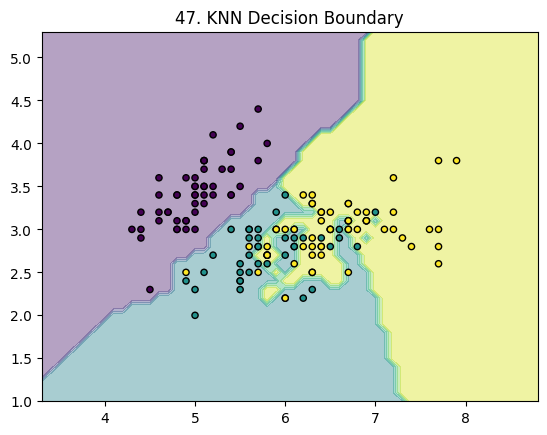

In [ ]:
# 47. Train a KNN Classifier and visualize the decision boundary
knn_boundary = KNeighborsClassifier(n_neighbors=3)
knn_boundary.fit(X_iris[:, :2], y_iris)

x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_boundary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, s=20, edgecolor='k')
plt.title('47. KNN Decision Boundary')
plt.show()

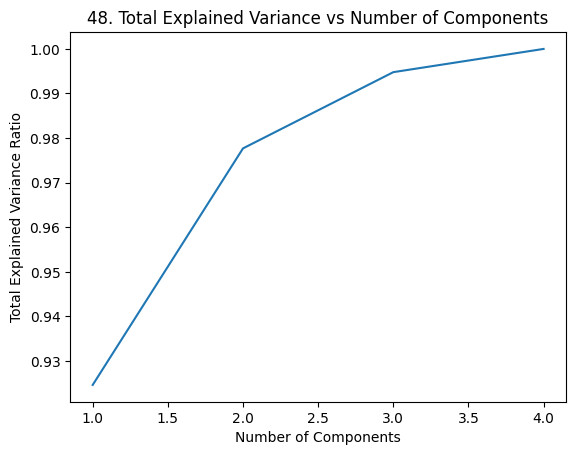

In [ ]:
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance.
variance_ratios = []
component_numbers = range(1, X_iris.shape[1] + 1)
for n_components in component_numbers:
    pca_variance_effect = PCA(n_components=n_components)
    pca_variance_effect.fit(X_iris)
    variance_ratios.append(np.sum(pca_variance_effect.explained_variance_ratio_))

plt.plot(component_numbers, variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance Ratio')
plt.title('48. Total Explained Variance vs Number of Components')
plt.show()